###  Autor: Lilian Rebeca Carrera Lemus 
No. Carnet: 20008077  


# Práctica No.3: Forward Propagation y Análisis de Representaciones Intermedias  



### Parte 1:
* Utilizando Numpy definir una función para calcular la salida de los siguientes modelos  
* Dado que cada sub-modelo "detecta" una característica intermedia h(variable latente) determinar para cada entrada la característica intermedia con mayor presencia. 

In [2]:
#Importamos librerías a usar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Modelo1:**
<img src="Modelo1.jpg">

In [4]:
# Definir la función de activación para las neuronas, en este caso sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [12]:
#Definimos una clase para el modelo 1, con bias
class RedNeuronal_Modelo1:
    def __init__(self, wc1, wc2):
        self.wc1 = wc1
        self.wc2 = wc2
    
    def forward_propagation(self, x):
        x = np.append(x, 1)
        act_l1 = sigmoid(np.matmul(x, self.wc1))
        l1_2 = np.append(act_l1, 1) #bias
        salida = sigmoid(np.matmul(l1_2, self.wc2))
        
        return salida, act_l1

In [14]:
#Pruebas para el modelo1
wc_1 = np.array([[5,7],[-2,-3],[-8,1]])
wc_2 = np.array([7,5,-6])
red_m1 = RedNeuronal_Modelo1(wc_1, wc_2)

In [17]:
#Forward propagation para modelo 1
y_aprox_m1, capa_ocul_1 = red_m1.forward_propagation(x = np.array([1,1]))

print("La salida del modelo1 es: ", y_aprox_m1)
print("Los valores de activación de la capa oculta son : ", capa_ocul_1)

La salida del modelo1 es:  0.2715813356119339
Los valores de activación de la capa oculta son :  [0.00669285 0.99330715]


**Conclusión Modelo1:** En este modelo, para las etradas x proporcionadas (1,1), la característica intermedia con mayor presencia esta dada por la neurona h2, de acuerdo a su valor de activación (0.99330715), ya que esta es la neura con mayor activación

**Modelo2:**
<img src="Modelo2.jpg">

In [30]:
#Definimos una clase para el modelo 2, en este caso sin bias
class RedNeuronal_Modelo2:
    def __init__(self, wc1, wc2):
        self.wc1 = wc1
        self.wc2 = wc2
        
    def forward_propagation(self, x):
        act_l1 = sigmoid(np.matmul(x, self.wc1))
        salida = sigmoid(np.matmul(act_l1, self.wc2))
        
        return salida, act_l1

In [31]:
#Pruebas para el modelo2
wc1 = np.array([[0.8, 0.4, 0.3],[0.2, 0.9, 0.5]]) 
wc2 = np.array([0.3, 0.5, 0.9])
red_m2 = RedNeuronal_Modelo2(wc1, wc2)

In [33]:
#Forward propagation para modelo 1
y_aprox_m2, capa_ocul_2 =red_m2.forward_propagation(x = np.array([1,1]))
    
print("La salida del modelo1 es: ", y_aprox_m2)
print("Los valores de activación de la capa oculta son : ", capa_ocul_2)

La salida del modelo1 es:  0.7743802720529458
Los valores de activación de la capa oculta son :  [0.73105858 0.78583498 0.68997448]


**Conclusión Modelo2:** En este modelo, para las etradas x proporcionadas (1,1), la característica intermedia con mayor presencia esta dada por la neurona h2, de acuerdo a su valor de activación (0.78583498), ya que esta es la neura con mayor activación respecto de las otras neuronas

### Parte 2:
* Calcular para cada posible punto en el dominio de xor la salida intermedia H = [h1, h2]
* Mostrar la matriz resultante H en el notebook
* Graficar cada punto de la representación intermedia (scatter), usar diferente color y o marker según su etiqueta. Puesto que tiene 2 posibles valores, la gráfica debe tener 2 colores o markers.
* Analizar el resultado intermedio, concluir y comentar opiniones

<img src="Modelo3.jpg">

In [77]:
#Definimos una clase para el modelo de XOR o modelo 3
class RedNeuronal_XOR:
    def __init__(self):
        self.wc1 = np.array([[-10, 20, 20], [30, -20, -20]])
        self.wc2 = np.array([-30, 20, 20])
        
    def forward_propagation(self, x):
        x = np.append(np.ones((x.shape[0], 1)), x, axis = -1)
        act_l1 = sigmoid(np.matmul(x, self.wc1.T))
        l1_2 = np.append(np.ones((act_l1.shape[0], 1)), act_l1, axis = -1)
        salida = sigmoid(np.matmul(l1_2, self.wc2.T))
      
        return salida, act_l1

In [76]:
#Definimos la entrada para xor
x_xor = np.array([[0,0], 
                  [0,1], 
                  [1,0], 
                  [1,1]])

In [81]:
#Pruebas de la clase
modelo_xor = RedNeuronal_XOR()

#Forward propagation
y_aprox_xor, capa_ocul_xor= modelo_xor.forward_propagation(x_xor)
    
print("La salida del XOR es: ", np.round(y_aprox_xor).reshape(1,-1))
print("-------------------------------------------------------\n")
print("Los valores de activación de la capa oculta son (Matriz H): \n", capa_ocul_xor)

La salida del XOR es:  [[0. 1. 1. 0.]]
-------------------------------------------------------

Los valores de activación de la capa oculta son (Matriz H): 
 [[4.53978687e-05 1.00000000e+00]
 [9.99954602e-01 9.99954602e-01]
 [9.99954602e-01 9.99954602e-01]
 [1.00000000e+00 4.53978687e-05]]


**Gráfica Representación Intermedia:**  
Graficar cada punto de la representación intermedia (scatter), usar diferente color y o marker según su etiqueta. Puesto que tiene 2 posibles valores, la gráfica debe tener 2 colores o markers.

Text(0.5, 1.0, 'Entradas originales XOR')

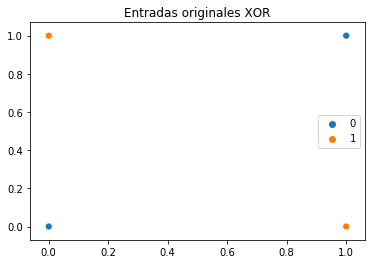

In [88]:
#Graficamos las entradas originales de XOR
grafica_ri= sns.scatterplot(x_xor[:,0], 
                            x_xor[:,1], 
                            hue = np.array([0, 1, 1, 0]),
                            s = 50)
grafica_ri.set_title("Entradas originales XOR")

Text(0.5, 1.0, 'Capa Oculta XOR')

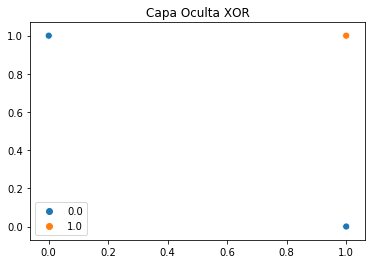

In [89]:
#Graficamos la representación intermedia
grafica_ri= sns.scatterplot(capa_ocul_xor[:,0], 
                            capa_ocul_xor[:,1], 
                            hue = np.round(y_aprox_xor),
                            s = 50)
grafica_ri.set_title("Capa Oculta XOR")

### Conclusiones:
* Como hemos observado en este ejercicio, con una red neuronal de dos capas es posible crear un perceptron multicapa que aproxime la función XOR.
* La representación intermedia de la capa oculta muestra un espacio latente en el que las dos clases son linealmente separables, lo cual no era posible con la entrada original (como se muestra en la primera gráfica). Esto permite que el perceptron multicapa pueda asignar el resultado correcto a todas las posibles entradas de la función XOR.